In [95]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [96]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

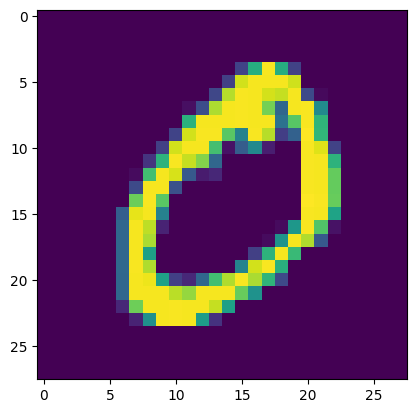

In [97]:
plt.imshow(X_train[1])

In [98]:
# converting all data points to lie in the range 0 - 1
# this is done to make the model converge faster and model learns faster

X_train = X_train/255
X_test = X_test/255

In [99]:
model = Sequential()
model.add(Conv2D(16, 3, padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D())
model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))


In [100]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [101]:
history = model.fit(X_train, y_train, batch_size=32, epochs=30, verbose=1, validation_data=(X_test, y_test))

Epoch 1/30
1875/1875 [==============================] - 29s 15ms/step - loss: 0.1669 - accuracy: 0.9482 - val_loss: 0.0494 - val_accuracy: 0.9845
Epoch 2/30
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0472 - accuracy: 0.9858 - val_loss: 0.0334 - val_accuracy: 0.9890
Epoch 3/30
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0364 - accuracy: 0.9888 - val_loss: 0.0323 - val_accuracy: 0.9892
Epoch 4/30
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0280 - accuracy: 0.9912 - val_loss: 0.0336 - val_accuracy: 0.9893
Epoch 5/30
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0225 - accuracy: 0.9927 - val_loss: 0.0342 - val_accuracy: 0.9889
Epoch 6/30
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0202 - accuracy: 0.9935 - val_loss: 0.0371 - val_accuracy: 0.9891
Epoch 7/30
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0166 - accuracy: 0.9950 - val_loss: 0.0433 -

In [102]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [103]:
y_prob = model.predict(X_test)

313/313 [==============================] - 2s 6ms/step


In [104]:
y_pred = y_prob.argmax(axis=1)

In [105]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.992

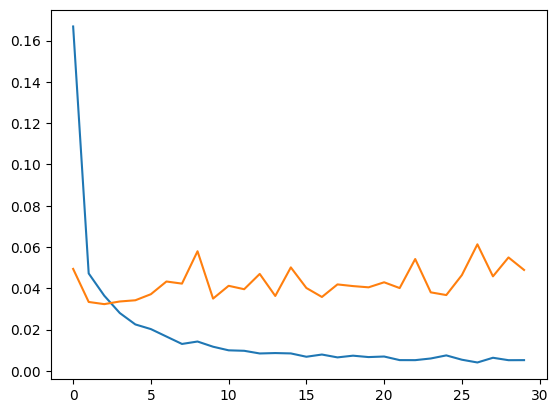

In [106]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

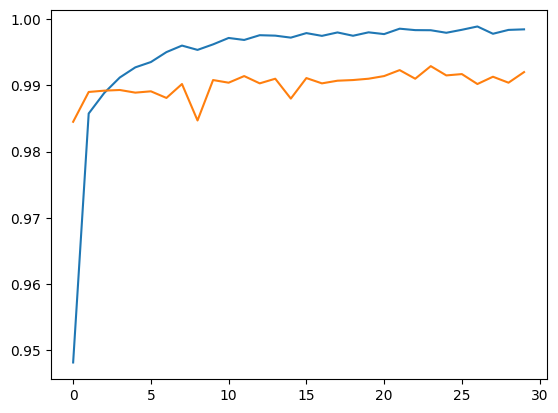

In [107]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])